
Housing Price Prediction

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

housing = fetch_california_housing(as_frame=True)
X = housing.data
y = housing.target

In [2]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB
None


In [3]:
print(X.describe())

             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude  
count  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704  
std       10.386050      2.135952      2.003532  
min        0.692308     32.540000   -124.350000  
25%        2.429741     33.930000   -1

In [4]:
print(y.describe())

count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
Name: MedHouseVal, dtype: float64


In [5]:
print('Missing values in features:\n', X.isnull().sum())
print('Missing values in target:', y.isnull().sum())

Missing values in features:
 MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64
Missing values in target: 0


In [6]:
print('Sample feature records:')
print(X.head())

Sample feature records:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  


In [7]:
print('Sample target values:')
print(y.head())

Sample target values:
0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64


In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled.shape)
print(X_test_scaled.shape)

(16512, 8)
(4128, 8)


OLS (Ordinary Least Squares) is the simplest and most classic form of linear regression.
It finds the coefficient vector
θ
θ that minimizes the sum of squared differences between actual and predicted values.

In [9]:
# Always use scaled features for scratch solutions!
X_train_bias_scaled = np.c_[np.ones((X_train_scaled.shape[0], 1)), X_train_scaled]
X_test_bias_scaled = np.c_[np.ones((X_test_scaled.shape[0], 1)), X_test_scaled]

# Normal Equation for OLS: theta = (X^T X)^(-1) X^T y
theta_best_scaled = np.linalg.inv(X_train_bias_scaled.T @ X_train_bias_scaled) @ X_train_bias_scaled.T @ y_train.values

# Predict on test set
y_pred_scratch_scaled = X_test_bias_scaled @ theta_best_scaled

# Evaluation
rmse_scratch_scaled = np.sqrt(np.mean((y_test.values - y_pred_scratch_scaled) ** 2))
mae_scratch_scaled = np.mean(np.abs(y_test.values - y_pred_scratch_scaled))
r2_scratch_scaled = 1 - np.sum((y_test.values - y_pred_scratch_scaled) ** 2) / np.sum((y_test.values - np.mean(y_test.values)) ** 2)

print("From Scratch (SCALED) - RMSE:", rmse_scratch_scaled)
print("From Scratch (SCALED) - MAE:", mae_scratch_scaled)
print("From Scratch (SCALED) - R²:", r2_scratch_scaled)

From Scratch (SCALED) - RMSE: 0.7455813830127762
From Scratch (SCALED) - MAE: 0.5332001304956564
From Scratch (SCALED) - R²: 0.575787706032451


In [10]:
# Add a bias column to features (unscaled data)
X_train_bias = np.c_[np.ones((X_train.shape[0], 1)), X_train.values]
X_test_bias = np.c_[np.ones((X_test.shape[0], 1)), X_test.values]

# Normal Equation for OLS: theta = (X^T X)^(-1) X^T y
theta_best = np.linalg.inv(X_train_bias.T @ X_train_bias) @ X_train_bias.T @ y_train.values

# theta_best[0] is intercept, theta_best[1:] are coefficients
# Predict on test set
y_pred_scratch = X_test_bias @ theta_best

rmse_scratch = np.sqrt(np.mean((y_test.values - y_pred_scratch) ** 2))
mae_scratch = np.mean(np.abs(y_test.values - y_pred_scratch))
r2_scratch = 1 - np.sum((y_test.values - y_pred_scratch) ** 2) / np.sum((y_test.values - np.mean(y_test.values)) ** 2)

print("From Scratch - RMSE:", rmse_scratch)
print("From Scratch - MAE:", mae_scratch)
print("From Scratch - R²:", r2_scratch)

From Scratch - RMSE: 0.7455813830132428
From Scratch - MAE: 0.5332001304929292
From Scratch - R²: 0.5757877060319201


linear regression using batch gradient descent

Gradient Descent (SCALED) - RMSE: 0.7455338671392188
Gradient Descent (SCALED) - MAE: 0.5327224809788811
Gradient Descent (SCALED) - R²: 0.5758417743766567


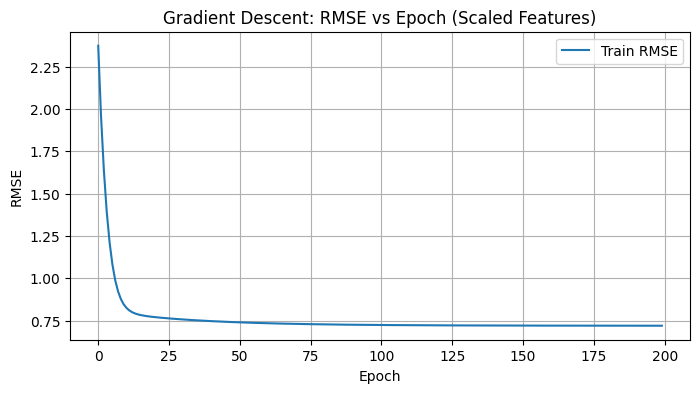

In [11]:
# Use scaled data and add bias column
X_train_gd = np.c_[np.ones((X_train_scaled.shape[0], 1)), X_train_scaled]
X_test_gd = np.c_[np.ones((X_test_scaled.shape[0], 1)), X_test_scaled]
y_train_gd = y_train.values

# Hyperparameters
learning_rate = 0.1
n_epochs = 200
tol = 1e-8

# Initialize
theta = np.zeros(X_train_gd.shape[1])
rmse_hist = []

for epoch in range(n_epochs):
    y_pred = X_train_gd @ theta
    error = y_pred - y_train_gd
    gradients = 2 / X_train_gd.shape[0] * (X_train_gd.T @ error)
    theta = theta - learning_rate * gradients

    # Track RMSE for plotting
    rmse = np.sqrt(np.mean(error ** 2))
    rmse_hist.append(rmse)

    # Optional: Early stopping
    if epoch > 0 and np.abs(rmse_hist[-1] - rmse_hist[-2]) < tol:
        break

# Final test predictions and scores
y_test_pred = X_test_gd @ theta
rmse_test = np.sqrt(np.mean((y_test.values - y_test_pred) ** 2))
mae_test = np.mean(np.abs(y_test.values - y_test_pred))
r2_test = 1 - np.sum((y_test.values - y_test_pred) ** 2) / np.sum((y_test.values - np.mean(y_test.values)) ** 2)

print("Gradient Descent (SCALED) - RMSE:", rmse_test)
print("Gradient Descent (SCALED) - MAE:", mae_test)
print("Gradient Descent (SCALED) - R²:", r2_test)

# Cost curve plot
plt.figure(figsize=(8,4))
plt.plot(rmse_hist, label="Train RMSE")
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.title("Gradient Descent: RMSE vs Epoch (Scaled Features)")
plt.legend()
plt.grid(True)
plt.show()


Implements linear regression “from scratch” by manually updating weights to minimize mean squared error using batch gradient descent.



In [12]:
# Prepare scaled train and test sets
X_train_scaled_np = X_train_scaled                       # shape: [n_samples, n_features]
y_train_np = y_train.values.reshape(-1, 1)               # ensure column vector

# Add bias column for intercept term
X_train_bias_scaled = np.c_[np.ones((X_train_scaled_np.shape[0], 1)), X_train_scaled_np]

# Initialize theta (parameters) to zeros
theta = np.zeros((X_train_bias_scaled.shape[1], 1))

# Hyperparameters
learning_rate = 0.001
n_epochs = 1000
m = X_train_bias_scaled.shape[0]

# Gradient Descent loop
for epoch in range(n_epochs):
    gradients = 2/m * X_train_bias_scaled.T.dot(X_train_bias_scaled.dot(theta) - y_train_np)
    theta = theta - learning_rate * gradients
    if epoch % 100 == 0:
        cost = np.mean((X_train_bias_scaled.dot(theta) - y_train_np) ** 2)
        print(f"Epoch {epoch}, Cost: {cost}")

# Predictions on test set (with bias)
X_test_scaled_np = X_test_scaled
X_test_bias_scaled = np.c_[np.ones((X_test_scaled_np.shape[0], 1)), X_test_scaled_np]
y_pred_gd = X_test_bias_scaled.dot(theta)

# Evaluation
rmse_gd = np.sqrt(mean_squared_error(y_test, y_pred_gd))
r2_gd = r2_score(y_test, y_pred_gd)
print("Gradient Descent (Scaled Data) RMSE:", rmse_gd)
print("Gradient Descent (Scaled Data) R²:", r2_gd)

Epoch 0, Cost: 5.609707293442701
Epoch 100, Cost: 3.965256896370822
Epoch 200, Cost: 2.8665457335888713
Epoch 300, Cost: 2.131111188695198
Epoch 400, Cost: 1.6379569782240908
Epoch 500, Cost: 1.3066235198785832
Epoch 600, Cost: 1.0834980211001541
Epoch 700, Cost: 0.9328025298439407
Epoch 800, Cost: 0.8306336343722107
Epoch 900, Cost: 0.7610070307325318
Gradient Descent (Scaled Data) RMSE: 0.8490014783592256
Gradient Descent (Scaled Data) R²: 0.4499400399226804


Stochastic Gradient Descent (SGD) for linear regression using scaled features. It updates model weights after seeing each random data point (not the whole batch), tracks the cost per epoch

In [13]:
# Use scaled features and targets
X_train_scaled_np = X_train_scaled
y_train_np = y_train.values.reshape(-1, 1)
X_train_bias_scaled = np.c_[np.ones((X_train_scaled_np.shape[0], 1)), X_train_scaled_np]

# SGD hyperparameters
learning_rate = 0.0001
n_epochs = 100    # More true epochs than batch GD, but each sees fewer samples per step
m = X_train_bias_scaled.shape[0]

theta = np.zeros((X_train_bias_scaled.shape[1], 1))
costs = []

for epoch in range(n_epochs):
    for i in range(m):
        # Randomly pick one instance (shuffle for robust training)
        random_index = np.random.randint(m)
        xi = X_train_bias_scaled[random_index:random_index+1]
        yi = y_train_np[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        theta = theta - learning_rate * gradients

    # Optional: monitor cost after each epoch
    cost = np.mean((X_train_bias_scaled.dot(theta) - y_train_np) ** 2)
    costs.append(cost)
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Cost: {cost}")

# Predictions and evaluation
X_test_bias_scaled = np.c_[np.ones((X_test_scaled.shape[0], 1)), X_test_scaled]
y_pred_sgd = X_test_bias_scaled.dot(theta)

from sklearn.metrics import mean_squared_error, r2_score
rmse_sgd = np.sqrt(mean_squared_error(y_test, y_pred_sgd))
r2_sgd = r2_score(y_test, y_pred_sgd)
print("SGD RMSE:", rmse_sgd)
print("SGD R²:", r2_sgd)

Epoch 0, Cost: 0.6098281382178898
Epoch 10, Cost: 0.5208500168105061
Epoch 20, Cost: 0.5292460627145757
Epoch 30, Cost: 0.5186571034724661
Epoch 40, Cost: 0.5208972698791317
Epoch 50, Cost: 0.5204161256112461
Epoch 60, Cost: 0.5198133949932928
Epoch 70, Cost: 0.5188219436059047
Epoch 80, Cost: 0.5202576456919935
Epoch 90, Cost: 0.5182913673179677
SGD RMSE: 0.7403631696450091
SGD R²: 0.5817049241354958


In [14]:
# Use scaled features and targets
X_train_scaled_np = X_train_scaled
y_train_np = y_train.values.reshape(-1, 1)
X_train_bias_scaled = np.c_[np.ones((X_train_scaled_np.shape[0], 1)), X_train_scaled_np]

# Hyperparameters
learning_rate = 0.01
n_epochs = 100
batch_size = 32            # Try 16, 64, etc. to see effects
m = X_train_bias_scaled.shape[0]

theta = np.zeros((X_train_bias_scaled.shape[1], 1))
costs = []

for epoch in range(n_epochs):
    # Shuffle indices for each epoch
    indices = np.random.permutation(m)
    X_epoch = X_train_bias_scaled[indices]
    y_epoch = y_train_np[indices]

    for i in range(0, m, batch_size):
        xi = X_epoch[i:i+batch_size]
        yi = y_epoch[i:i+batch_size]
        gradients = 2/xi.shape[0] * xi.T.dot(xi.dot(theta) - yi)
        theta = theta - learning_rate * gradients

    # Monitor cost
    cost = np.mean((X_train_bias_scaled.dot(theta) - y_train_np) ** 2)
    costs.append(cost)
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Cost: {cost}")

# Evaluation on test set
X_test_bias_scaled = np.c_[np.ones((X_test_scaled.shape[0], 1)), X_test_scaled]
y_pred_mbgd = X_test_bias_scaled.dot(theta)

from sklearn.metrics import mean_squared_error, r2_score
rmse_mbgd = np.sqrt(mean_squared_error(y_test, y_pred_mbgd))
r2_mbgd = r2_score(y_test, y_pred_mbgd)
print("Mini-batch GD RMSE:", rmse_mbgd)
print("Mini-batch GD R²:", r2_mbgd)

Epoch 0, Cost: 0.612141747911631
Epoch 10, Cost: 0.54023796323053
Epoch 20, Cost: 0.5280392489958524
Epoch 30, Cost: 0.6172220849073787
Epoch 40, Cost: 0.5273646797286823
Epoch 50, Cost: 0.5204935606548099
Epoch 60, Cost: 0.5315636810439717
Epoch 70, Cost: 0.5818382302214006
Epoch 80, Cost: 0.7266355675855878
Epoch 90, Cost: 0.666516787527342
Mini-batch GD RMSE: 0.7408209538859379
Mini-batch GD R²: 0.5811874805274883


Polynomial Features

In [15]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1. Make polynomial features (let’s start with degree 2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# 2. Fit linear regression on poly features
lin_reg_poly = LinearRegression()
lin_reg_poly.fit(X_train_poly, y_train)

# 3. Predict and evaluate
y_pred_poly = lin_reg_poly.predict(X_test_poly)
rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))
r2_poly = r2_score(y_test, y_pred_poly)
print("Polynomial Regression (deg 2) RMSE:", rmse_poly)
print("Polynomial Regression (deg 2) R²:", r2_poly)

# Optional: Try degree=3 or higher for more flexibility, but risk overfitting


Polynomial Regression (deg 2) RMSE: 0.6813967449720241
Polynomial Regression (deg 2) R²: 0.6456819727519338


In [16]:
poly = PolynomialFeatures(degree=3, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

lin_reg_poly = LinearRegression()
lin_reg_poly.fit(X_train_poly, y_train)

y_pred_poly = lin_reg_poly.predict(X_test_poly)
rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))
r2_poly = r2_score(y_test, y_pred_poly)
print("Polynomial Regression (deg 3) RMSE:", rmse_poly)
print("Polynomial Regression (deg 3) R²:", r2_poly)

Polynomial Regression (deg 3) RMSE: 2.145071307158384
Polynomial Regression (deg 3) R²: -2.51137010597335


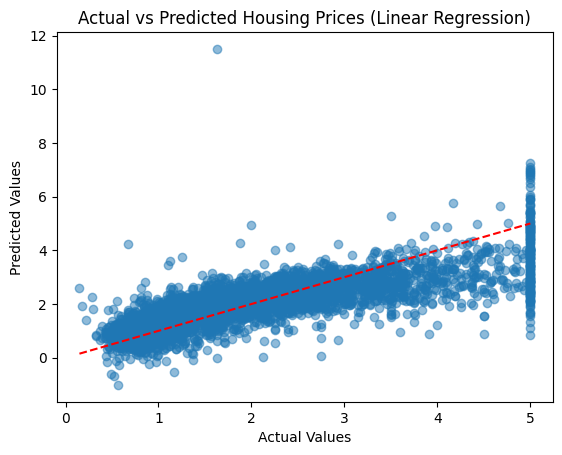

In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.linear_model import LinearRegression

# Assuming y_test and X_test_scaled are defined from the train_test_split and scaling

# Define and train the Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

# Generate predictions using the trained lin_reg model and scaled test data
y_pred = lin_reg.predict(X_test_scaled)

plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Housing Prices (Linear Regression)")
plt.show()

In [18]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Ridge Regression
ridge = Ridge(alpha=1.0)
# Use cross-validation on the training data
scores_ridge = cross_val_score(ridge, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
rmse_scores_ridge = np.sqrt(-scores_ridge)

print("Ridge Regression CV RMSEs:", rmse_scores_ridge)
print("Ridge Regression Mean CV RMSE:", rmse_scores_ridge.mean())
print("Ridge Regression Std CV RMSE:", rmse_scores_ridge.std(), '\n')


# Lasso Regression
lasso = Lasso(alpha=0.1)
# Use cross-validation on the training data
scores_lasso = cross_val_score(lasso, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
rmse_scores_lasso = np.sqrt(-scores_lasso)

print("Lasso Regression CV RMSEs:", rmse_scores_lasso)
print("Lasso Regression Mean CV RMSE:", rmse_scores_lasso.mean())
print("Lasso Regression Std CV RMSE:", rmse_scores_lasso.std())


# Keep the print_metrics function here in case needed for test set evaluation later
def print_metrics(name, y_true, y_pred):
    print(f"{name} RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print(f"{name} MAE:", mean_absolute_error(y_true, y_pred))
    print(f"{name} R²:", r2_score(y_true, y_pred), '\n')

# Note: Test set evaluation is not performed in this cell as per the requirement to use CV for reporting.
# If you need test set metrics, you would train the model on the full training set (outside of cross_val_score)
# and then evaluate on the test set.

Ridge Regression CV RMSEs: [0.72116044 0.70872773 0.72149577 0.71266826 0.73858446]
Ridge Regression Mean CV RMSE: 0.7205273313349767
Ridge Regression Std CV RMSE: 0.0102800194474259 

Lasso Regression CV RMSEs: [0.82674845 0.80506869 0.82510848 0.81542317 0.82649643]
Lasso Regression Mean CV RMSE: 0.819769043772667
Lasso Regression Std CV RMSE: 0.008455370671793958


Ridge Regression performance nearly identical to standard Linear Regression
Lasso Regression performance worse than Ridge/Linear

ElasticNet Regression (L1 + L2 regularization)

In [19]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# ElasticNet Regression
# Fit ElasticNet model (feel free to tune alpha/l1_ratio for your data)
elastic = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42)

# Use cross-validation on the training data
scores_elastic = cross_val_score(elastic, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
rmse_scores_elastic = np.sqrt(-scores_elastic)
r2_scores_elastic = cross_val_score(elastic, X_train_scaled, y_train, cv=5, scoring='r2')


print("ElasticNet Regression CV RMSEs:", rmse_scores_elastic)
print("ElasticNet Regression Mean CV RMSE:", rmse_scores_elastic.mean())
print("ElasticNet Regression Std CV RMSE:", rmse_scores_elastic.std(), '\n')

print("ElasticNet Regression CV R² scores:", r2_scores_elastic)
print("ElasticNet Regression Mean CV R² score:", r2_scores_elastic.mean())
print("ElasticNet Regression Std CV R² score:", r2_scores_elastic.std())

# Note: Test set evaluation is not performed in this cell as per the requirement to use CV for reporting.
# If you need test set metrics, you would train the model on the full training set (outside of cross_val_score)
# and then evaluate on the test set.

ElasticNet Regression CV RMSEs: [1.0438147  1.01141618 1.03266288 1.01660077 1.03992299]
ElasticNet Regression Mean CV RMSE: 1.0288835022519192
ElasticNet Regression Std CV RMSE: 0.012767675006796557 

ElasticNet Regression CV R² scores: [0.20413224 0.21181813 0.20809263 0.20784571 0.20739478]
ElasticNet Regression Mean CV R² score: 0.207856698490464
ElasticNet Regression Std CV R² score: 0.002442691142007454


In [20]:
from sklearn.model_selection import train_test_split

# Split train to validate
X_tr, X_val, y_tr, y_val = train_test_split(X_train_scaled, y_train, test_size=0.2, random_state=42)
X_tr_bias = np.c_[np.ones((X_tr.shape[0], 1)), X_tr]
X_val_bias = np.c_[np.ones((X_val.shape[0], 1)), X_val]
theta = np.zeros((X_tr_bias.shape[1], 1))

learning_rate = 0.001
n_epochs = 1000
best_val_rmse = np.inf
patience = 10
wait = 0

for epoch in range(n_epochs):
    gradients = 2/X_tr_bias.shape[0] * X_tr_bias.T.dot(X_tr_bias.dot(theta) - y_tr.values.reshape(-1,1))
    theta = theta - learning_rate * gradients
    y_val_pred = X_val_bias.dot(theta)
    val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
    if val_rmse < best_val_rmse:
        best_val_rmse = val_rmse
        wait = 0
    else:
        wait += 1
        if wait >= patience:
            print(f"Early stopping at epoch {epoch}, validation RMSE: {val_rmse}")
            break
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Validation RMSE: {val_rmse}")


Epoch 0, Validation RMSE: 2.395062048307267
Epoch 100, Validation RMSE: 2.0153401316020783
Epoch 200, Validation RMSE: 1.7148642962739522
Epoch 300, Validation RMSE: 1.4796967276401503
Epoch 400, Validation RMSE: 1.2981614988692949
Epoch 500, Validation RMSE: 1.1602547447957614
Epoch 600, Validation RMSE: 1.0572734957307501
Epoch 700, Validation RMSE: 0.9816501067218989
Epoch 800, Validation RMSE: 0.9269263166803778
Epoch 900, Validation RMSE: 0.8877670636711217


In [21]:
learning_rate = 0.01
n_epochs = 1000
schedule = 200  # halve LR every schedule epochs
theta = np.zeros((X_tr_bias.shape[1], 1))
rmse_list = []

for epoch in range(n_epochs):
    if epoch % schedule == 0 and epoch > 0:
        learning_rate /= 2
    gradients = 2/X_tr_bias.shape[0] * X_tr_bias.T.dot(X_tr_bias.dot(theta) - y_tr.values.reshape(-1, 1))
    theta = theta - learning_rate * gradients
    y_val_pred = X_val_bias.dot(theta)
    val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
    rmse_list.append(val_rmse)
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Validation RMSE: {val_rmse}, Learning Rate: {learning_rate}")


Epoch 0, Validation RMSE: 2.356842539521669, Learning Rate: 0.01
Epoch 100, Validation RMSE: 0.8560073344293788, Learning Rate: 0.01
Epoch 200, Validation RMSE: 0.7880422476312973, Learning Rate: 0.005
Epoch 300, Validation RMSE: 0.7801661238725697, Learning Rate: 0.005
Epoch 400, Validation RMSE: 0.7739798862083408, Learning Rate: 0.0025
Epoch 500, Validation RMSE: 0.7712311232852812, Learning Rate: 0.0025
Epoch 600, Validation RMSE: 0.7686934483246952, Learning Rate: 0.00125
Epoch 700, Validation RMSE: 0.767487026639024, Learning Rate: 0.00125
Epoch 800, Validation RMSE: 0.7663297686371223, Learning Rate: 0.000625
Epoch 900, Validation RMSE: 0.7657639748915482, Learning Rate: 0.000625


K-Fold Cross-Validation (CV) for Robust Metrics

In [22]:
lin_reg = LinearRegression()
# 5-Fold CV, scoring by negative mean squared error
scores = cross_val_score(lin_reg, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)
print("K-Fold RMSEs:", rmse_scores)
print("Mean RMSE:", rmse_scores.mean())
print("Std RMSE:", rmse_scores.std())


K-Fold RMSEs: [0.72115555 0.70872616 0.7214877  0.71266905 0.73859747]
Mean RMSE: 0.7205271873526421
Std RMSE: 0.01028462099732263


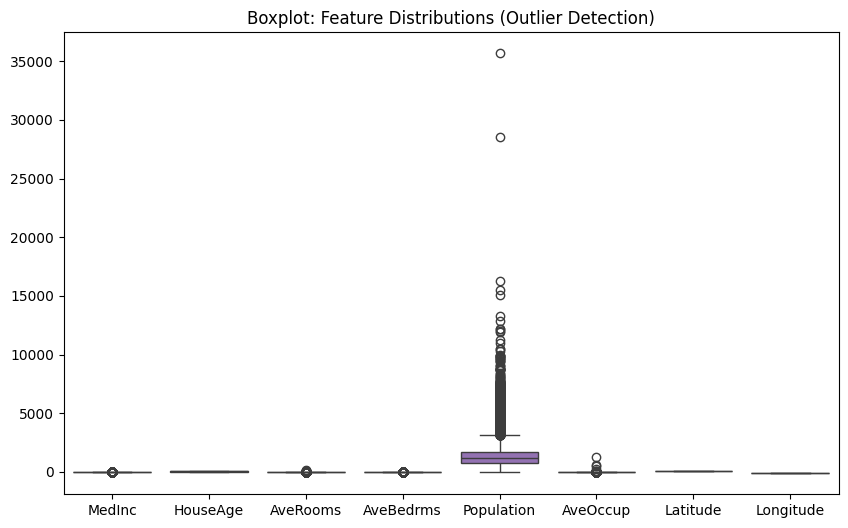

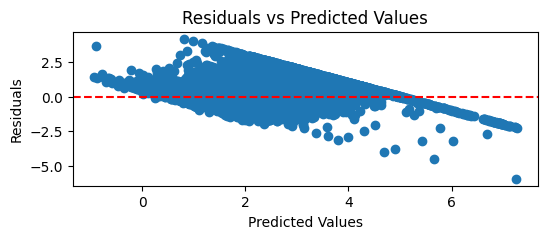

In [23]:
import seaborn as sns
# Boxplot: Choose individual features
plt.figure(figsize=(10, 6))
sns.boxplot(data=X_train)
plt.title("Boxplot: Feature Distributions (Outlier Detection)")
plt.show()

# Scatter: Residual plot after linear fit
lin_reg = LinearRegression().fit(X_train_scaled, y_train)
y_train_pred = lin_reg.predict(X_train_scaled)
residuals = y_train - y_train_pred

plt.figure(figsize=(6,2))
plt.scatter(y_train_pred, residuals)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.show()


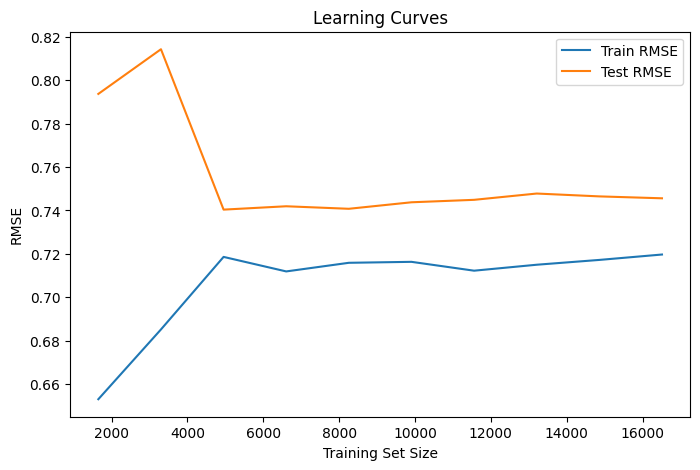

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

train_sizes = np.linspace(0.1, 1.0, 10)  # Use 10 steps from 10% to 100% of training data
train_errors = []
test_errors = []

for train_size in train_sizes:
    n_train = int(train_size * X_train_scaled.shape[0])
    X_sub = X_train_scaled[:n_train]
    y_sub = y_train[:n_train]
    model = LinearRegression().fit(X_sub, y_sub)
    y_sub_pred = model.predict(X_sub)
    y_test_pred = model.predict(X_test_scaled)
    train_errors.append(np.sqrt(mean_squared_error(y_sub, y_sub_pred)))
    test_errors.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))

plt.figure(figsize=(8, 5))
plt.plot(train_sizes * len(X_train_scaled), train_errors, label="Train RMSE")
plt.plot(train_sizes * len(X_train_scaled), test_errors, label="Test RMSE")
plt.xlabel("Training Set Size")
plt.ylabel("RMSE")
plt.title("Learning Curves")
plt.legend()
plt.show()

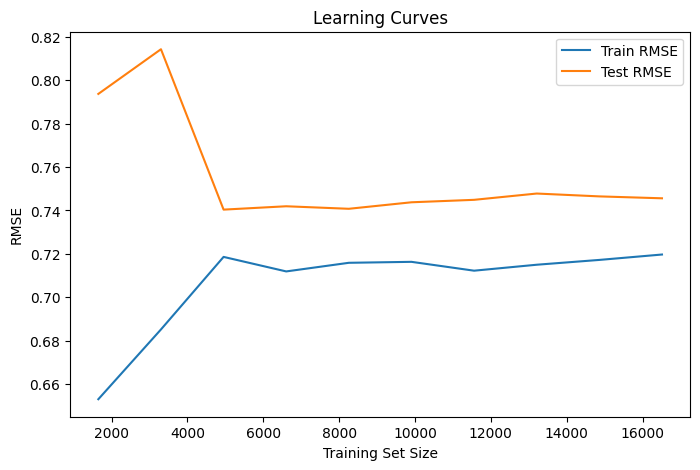

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

train_sizes = np.linspace(0.1, 1.0, 10)
train_rmse = []
test_rmse = []

for frac in train_sizes:
    n = int(frac * len(X_train_scaled))
    X_sub = X_train_scaled[:n]
    y_sub = y_train[:n]
    reg = LinearRegression().fit(X_sub, y_sub)
    y_sub_pred = reg.predict(X_sub)
    y_test_pred = reg.predict(X_test_scaled)
    train_rmse.append(np.sqrt(mean_squared_error(y_sub, y_sub_pred)))
    test_rmse.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))

plt.figure(figsize=(8,5))
plt.plot(train_sizes * len(X_train_scaled), train_rmse, label="Train RMSE")
plt.plot(train_sizes * len(X_train_scaled), test_rmse, label="Test RMSE")
plt.xlabel("Training Set Size")
plt.ylabel("RMSE")
plt.title("Learning Curves")
plt.legend()
plt.show()


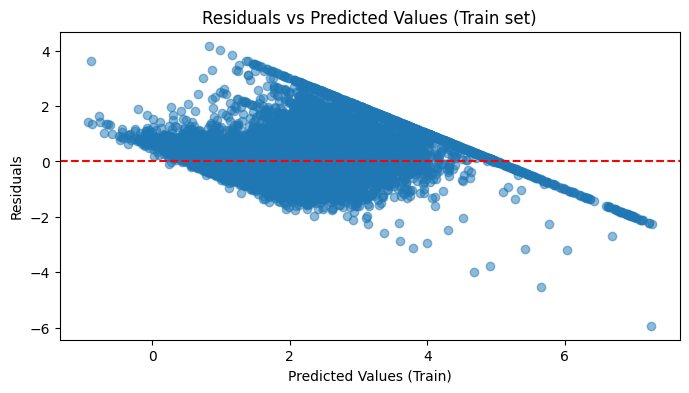

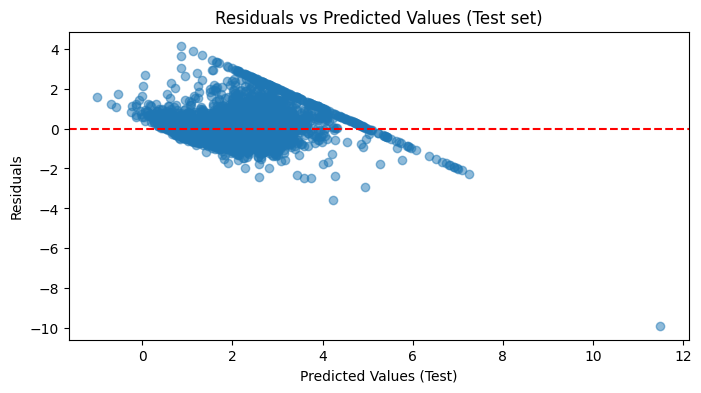

In [26]:
# Fit the model on all train data
lin_reg = LinearRegression().fit(X_train_scaled, y_train)
y_train_pred = lin_reg.predict(X_train_scaled)
residuals = y_train - y_train_pred

plt.figure(figsize=(8,4))
plt.scatter(y_train_pred, residuals, alpha=0.5)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("Predicted Values (Train)")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values (Train set)")
plt.show()

# Optionally repeat for test set
y_test_pred = lin_reg.predict(X_test_scaled)
test_residuals = y_test - y_test_pred
plt.figure(figsize=(8,4))
plt.scatter(y_test_pred, test_residuals, alpha=0.5)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("Predicted Values (Test)")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values (Test set)")
plt.show()


Polynomial features

In [27]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

lin_reg_poly = LinearRegression()
lin_reg_poly.fit(X_train_poly, y_train)
y_pred_poly = lin_reg_poly.predict(X_test_poly)

print("Polynomial RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_poly)))
print("Polynomial R²:", r2_score(y_test, y_pred_poly))

Polynomial RMSE: 0.6813967449720241
Polynomial R²: 0.6456819727519338


In [28]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Define pipeline
pipe = Pipeline([
    ("scale", StandardScaler()),
    ("poly", PolynomialFeatures(degree=2, include_bias=False)),
    ("ridge", Ridge())
])

# Search over alpha
param_grid = {
    "poly__degree": [2, 3],
    "ridge__alpha": [0.01, 0.1, 1, 10, 100]
}

search = GridSearchCV(pipe, param_grid, scoring="neg_mean_squared_error", cv=5)
search.fit(X_train, y_train)

print("Best degree:", search.best_params_["poly__degree"])
print("Best alpha:", search.best_params_["ridge__alpha"])
print("Best CV RMSE:", np.sqrt(-search.best_score_))

# Evaluate on test set
y_pred_poly = search.predict(X_test)
rmse_poly = np.sqrt(np.mean((y_test - y_pred_poly)**2))
mae_poly = np.mean(np.abs(y_test - y_pred_poly))
r2_poly = 1 - np.sum((y_test - y_pred_poly)**2) / np.sum((y_test - np.mean(y_test))**2)

print("Polynomial + Ridge - Test RMSE:", rmse_poly)
print("Polynomial + Ridge - Test MAE:", mae_poly)
print("Polynomial + Ridge - Test R²:", r2_poly)


Best degree: 2
Best alpha: 100
Best CV RMSE: 0.7617856339389382
Polynomial + Ridge - Test RMSE: 0.668883008865287
Polynomial + Ridge - Test MAE: 0.4773667977094855
Polynomial + Ridge - Test R²: 0.658576454391149


In [29]:
from sklearn.model_selection import cross_val_score

def report_cv(model, name, X=X_train, y=y_train, scoring="neg_root_mean_squared_error"):
    scores = cross_val_score(model, X, y, cv=5, scoring=scoring)
    print(f"{name} CV RMSE: {np.mean(-scores):.4f} (+/- {np.std(scores):.4f})")

# Linear Regression
from sklearn.linear_model import LinearRegression
report_cv(LinearRegression(), "Linear Regression")

# Ridge Regression (optimized alpha from prior GridSearch)
report_cv(Ridge(alpha=search.best_params_["ridge__alpha"]), "Ridge Regression")

# If you tune other models: Lasso, ElasticNet, etc
from sklearn.linear_model import Lasso, ElasticNet
report_cv(Lasso(alpha=0.1), "Lasso Regression")
report_cv(ElasticNet(alpha=0.1, l1_ratio=0.7), "ElasticNet Regression")


Linear Regression CV RMSE: 0.7205 (+/- 0.0103)
Ridge Regression CV RMSE: 0.7210 (+/- 0.0098)
Lasso Regression CV RMSE: 0.7768 (+/- 0.0083)
ElasticNet Regression CV RMSE: 0.7584 (+/- 0.0083)


add an interaction feature to see if there is any improvement

In [30]:
X_train_inter = X_train.copy()
X_test_inter = X_test.copy()
# Create a new interaction feature
X_train_inter['MedInc_AveRooms'] = X_train_inter['MedInc'] * X_train_inter['AveRooms']
X_test_inter['MedInc_AveRooms'] = X_test_inter['MedInc'] * X_test_inter['AveRooms']

# OPTIONAL: You can create more such interaction features, e.g.
X_train_inter['MedInc_Population'] = X_train_inter['MedInc'] * X_train_inter['Population']
X_test_inter['MedInc_Population'] = X_test_inter['MedInc'] * X_test_inter['Population']

In [31]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_inter)
X_test_scaled = scaler.transform(X_test_inter)
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
y_pred_inter = lin_reg.predict(X_test_scaled)
# Evaluate
from sklearn.metrics import mean_squared_error, r2_score
print("With Interaction RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_inter)))
print("With Interaction R²:", r2_score(y_test, y_pred_inter))

With Interaction RMSE: 0.7417365278373137
With Interaction R²: 0.580151627573012


In [32]:
# Create interaction feature for train and test sets
X_train_inter = X_train.copy()
X_test_inter = X_test.copy()
X_train_inter['MedInc_AveRooms'] = X_train_inter['MedInc'] * X_train_inter['AveRooms']
X_test_inter['MedInc_AveRooms'] = X_test_inter['MedInc'] * X_test_inter['AveRooms']

# Scale with the interaction term included
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_inter)
X_test_scaled = scaler.transform(X_test_inter)

# Train and evaluate
lin_reg_inter = LinearRegression()
lin_reg_inter.fit(X_train_scaled, y_train)
y_pred_inter = lin_reg_inter.predict(X_test_scaled)

print("Interaction RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_inter)))
print("Interaction R²:", r2_score(y_test, y_pred_inter))

Interaction RMSE: 0.7420870632181685
Interaction R²: 0.5797547036536489


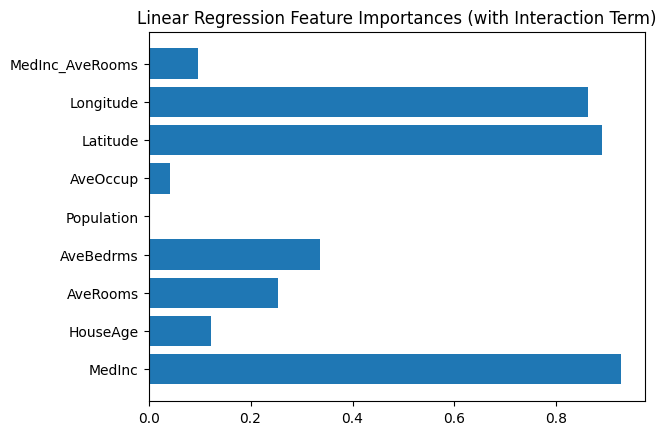

In [33]:
importances = abs(lin_reg_inter.coef_)
plt.barh(X_train_inter.columns, importances)
plt.title('Linear Regression Feature Importances (with Interaction Term)')
plt.show()

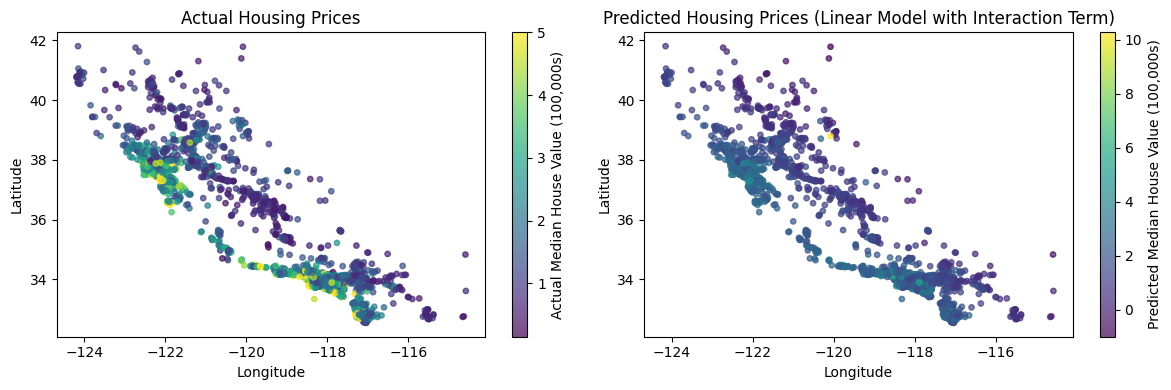

In [34]:
lons = X_test['Longitude']
lats = X_test['Latitude']
y_true = y_test
y_pred = lin_reg_inter.predict(X_test_scaled)

plt.figure(figsize=(12, 4))

# Actual Prices
plt.subplot(1, 2, 1)
scatter1 = plt.scatter(lons, lats, c=y_true, cmap='viridis', s=15, alpha=0.7)
plt.colorbar(scatter1, label='Actual Median House Value (100,000s)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Actual Housing Prices')

# Predicted Prices
plt.subplot(1, 2, 2)
scatter2 = plt.scatter(lons, lats, c=y_pred, cmap='viridis', s=15, alpha=0.7)
plt.colorbar(scatter2, label='Predicted Median House Value (100,000s)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Predicted Housing Prices (Linear Model with Interaction Term)')

plt.tight_layout()
plt.show()

SHAP (SHapley Additive exPlanations) is a method to explain individual predictions of machine learning models. It shows how much each feature contributed to the prediction for a single example, using values based on cooperative game theory. SHAP values help us understand which features make the prediction higher or lower, and by how much, for each data point

In [35]:
import shap

feature_name_mapping = {
'MedInc': 'Median Income',
'HouseAge': 'House Age',
'AveRooms': 'Average Rooms',
'AveBedrms': 'Average Bedrooms',
'Population': 'Population',
'AveOccup': 'Average Occupancy',
'Latitude': 'Latitude',
'Longitude': 'Longitude',
'MedInc_AveRooms': 'Median Income × Average Rooms',
'MedInc_Population': 'Median Income × Population'
}

# Create dataframes with friendly names for SHAP analysis
X_test_inter_friendly = X_test_inter.rename(columns=feature_name_mapping)
X_train_inter_friendly = X_train_inter.rename(columns=feature_name_mapping)

print("Original feature names:", X_test_inter.columns.tolist())
print("Friendly feature names:", X_test_inter_friendly.columns.tolist())

# Create explainer with friendly-named data
explainer_friendly = shap.Explainer(lin_reg_inter, X_train_inter_friendly)

# Get SHAP values for all test data using friendly names
shap_values_friendly = explainer_friendly(X_test_inter_friendly)

# Initialize SHAP JavaScript
shap.initjs()

Original feature names: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'MedInc_AveRooms']
Friendly feature names: ['Median Income', 'House Age', 'Average Rooms', 'Average Bedrooms', 'Population', 'Average Occupancy', 'Latitude', 'Longitude', 'Median Income × Average Rooms']



 Bar plot:


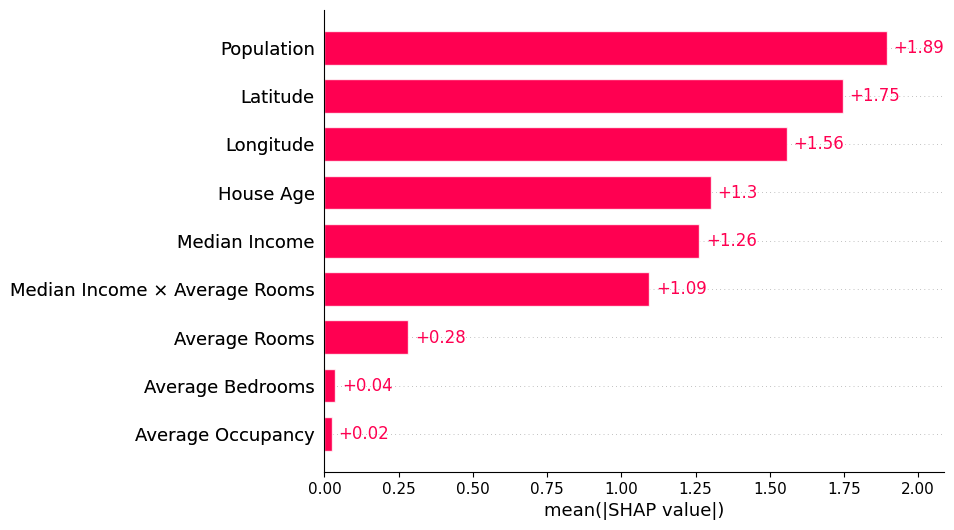

In [36]:
print("\n Bar plot:")
shap.plots.bar(shap_values_friendly)


 Waterfall plot:


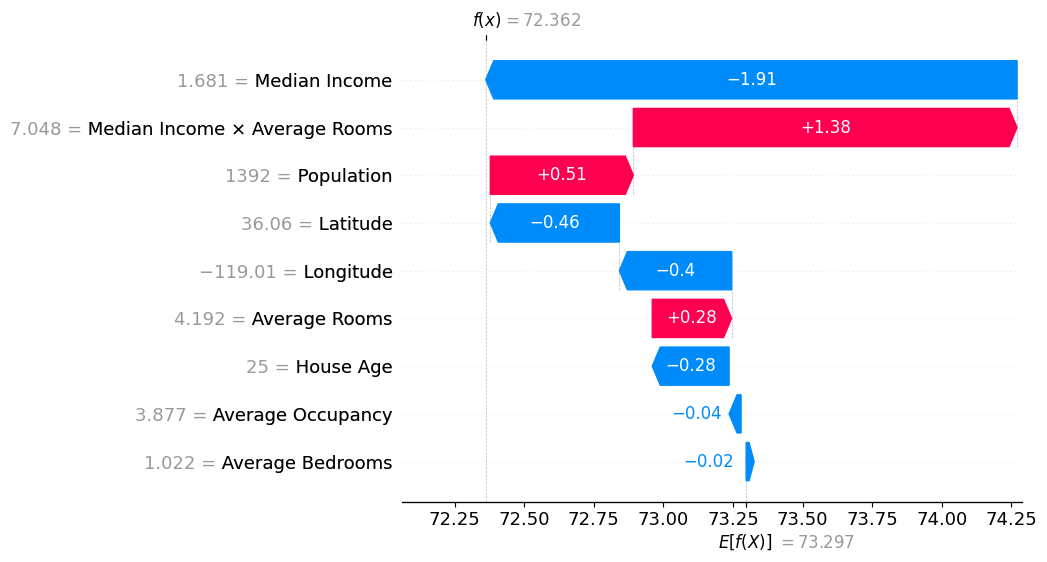

In [37]:
print("\n Waterfall plot:")
shap.plots.waterfall(shap_values_friendly[0])